# PHYS 308 - Notebook 04 - NumPy

Interactive learning notebook developed by J. Dolen for PHYS 308 at Purdue University Northwest



## What is NumPy?

NumPy (Numerical Python) is a python package designed for scientific computing which provides numerous important tools and the powerful NumPy array object. NumPy gives python many of the same tools available in MATLAB. NumPy is related to SciPy which we will try later.

Please find further documentation on NumPy here: https://docs.scipy.org/doc/

If you are a MATLAB user the following table could be helpful for learning NumPy:
https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html



## Why Use NumPy for Physics?

As a physics student, you'll often deal with large datasets from experiments or simulations. A standard Python list is often too slow for the complex mathematical operations you'll need. NumPy is the solution.

* **Speed:** NumPy's core operations are written in a low-level language (C), making them orders of magnitude faster than equivalent Python code.
* **Memory Efficiency:** NumPy arrays take up less memory than Python lists.
* **Convenience:** NumPy provides a huge library of high-level mathematical functions that operate on entire arrays without needing to write `for` loops. This is called **vectorization**.



## Importing NumPy

We can make our code more readable, avoid namespace collisions, and access the full NumPy library by importing the whole package and giving it the alias `np`:


In [ ]:
import numpy as np

The standard `import numpy as np` is best practice because it creates a dedicated `np` namespace, which explicitly tells the Python interpreter where to find each function. This prevents errors from conflicting libraries and makes your code's intent clear to anyone reading it. For example:


In [ ]:
a = np.array([np.pi/4, np.pi/2, 3*np.pi/4,2*np.pi]) # use numpy function array()
b = np.sin(a) # use numpy funcion sin() to calculate the sine of every element in the array
print(b)

[ 7.07106781e-01  1.00000000e+00  7.07106781e-01 -2.44929360e-16]


## Data Types in NumPy

NumPy has its own data types (`dtypes`) because Python's built-in types like `int` and `float` are inefficient for large-scale numerical work (built-in types are complete objects with significant overhead). NumPy's dtypes map directly to how data is stored in computer memory, which allows for massive performance gains by using optimized, low-level C and Fortran code. It offers multiple versions of these types, such as `int8` versus `int64`, to give you precise control over memory usage and the range of values each number can store, which is critical for optimizing scientific computations.

Note: We will have a specific notebook dedicated to accuracy in Python

You can look up more about NumPy datatypes here:
https://numpy.org/doc/stable/user/basics.types.html

We can also print some useful information about some common data types:

In [ ]:
# Create a list of common NumPy data types
common_dtypes = [
    np.bool_, np.int8, np.uint8, np.int16, np.uint16,
    np.int32, np.uint32, np.int64, np.uint64,
    np.float16, np.float32, np.float64,
    np.complex64, np.complex128
]

# Create a nice table describing these data types
print("-" * 75)
print(f"{'NumPy Data Types ':^75}")
print("-" * 75)
print(f"{'Data Type':<12} {'Description':<25} {'Range or Details'}")
print("-" * 75)

for dtype in common_dtypes:
    # Get the dtype object from the class
    dtype_obj = np.dtype(dtype)
    name = dtype_obj.name

    # Check the 'kind' of data: 'i' for signed int, 'u' for unsigned, 'f' for float, etc.
    if dtype_obj.kind in 'iu':
        info = np.iinfo(dtype_obj)
        kind_desc = "Unsigned Integer" if dtype_obj.kind == 'u' else "Integer"
        print(f"{name:<12} {kind_desc:<25} ({info.min} to {info.max})")
    elif dtype_obj.kind == 'f':
        info = np.finfo(dtype_obj)
        kind_desc = "Floating-Point"
        print(f"{name:<12} {kind_desc:<25} (Precision: {info.precision} digits, Epsilon: {info.eps})")
    elif dtype_obj.kind == 'b':
        kind_desc = "Boolean"
        print(f"{name:<12} {kind_desc:<25} (True or False)")
    elif dtype_obj.kind == 'c':
        kind_desc = "Complex Number"
        print(f"{name:<12} {kind_desc:<25} (real and imaginary parts)")

---------------------------------------------------------------------------
                             NumPy Data Types                              
---------------------------------------------------------------------------
Data Type    Description               Range or Details
---------------------------------------------------------------------------
bool         Boolean                   (True or False)
int8         Integer                   (-128 to 127)
uint8        Unsigned Integer          (0 to 255)
int16        Integer                   (-32768 to 32767)
uint16       Unsigned Integer          (0 to 65535)
int32        Integer                   (-2147483648 to 2147483647)
uint32       Unsigned Integer          (0 to 4294967295)
int64        Integer                   (-9223372036854775808 to 9223372036854775807)
uint64       Unsigned Integer          (0 to 18446744073709551615)
float16      Floating-Point            (Precision: 3 digits, Epsilon: 0.0009765625)
float32      

## NumPy arrays

A NumPy array is a powerful data structure containing a grid of values where all elements must be the same data type. This uniformity is a key difference from Python lists, which can hold a mix of types (like an integer and a string). When you create an array, NumPy will automatically infer the most suitable data type from your input, but you can also explicitly specify it yourself for precise control over memory and performance. Because of this fixed type, mathematical operations on NumPy arrays are significantly faster and more memory-efficient than on standard Python lists.


### Creating NumPy Arrays


There are many ways to create a NumPy array. The method you choose depends on whether you have existing data or want to create an array from scratch.


https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html


#### Create an array from a list

The np.array() function is one method to create a NumPy array. Its main job is to convert existing data, most often a Python list, into a NumPy array. It is flexible, so it can also convert a tuple, string, or iterable like range to an NumPy array.

The basic syntax is `np.array(object, dtype=None)`, where:

  * `object`: (Required) This is the data you want to convert into an array. It's typically a Python list or a list of lists.

  * `dtype`: (Optional) This is where you can explicitly set the data type for the elements in the array.

NumPy arrays have many useful attributes that describe their properties. For example, you can check the data type of an array's elements by accessing its `.dtype` attribute.

##### 1D Arrays

In [ ]:
my_list = [10, 20, 30, 40, 50] # a list of integeres
my_array = np.array(my_list) # Convert the list to a NumPy array

print(f"The array:\n{my_array}")
print(f"The array's data type: {my_array.dtype}")

The array:
[10 20 30 40 50]
The array's data type: int64


In [ ]:
mixed_list = [1, 2, 3.14, 4, 5.0] # a list with integers and floats
mixed_array = np.array(mixed_list) # NumPy upcasts everything to float64 to accommodate 3.14

print(f"The mixed-type array:\n{mixed_array}")
print(f"The array's data type: {mixed_array.dtype}")

The mixed-type array:
[1.   2.   3.14 4.   5.  ]
The array's data type: float64


In [ ]:
# create a list with square brackets
another_list = [ 1.0, 1.5, -2.2]

#convert to an array, directly specifying float, which is an alias for float64
my_array2 = np.array(another_list,float)  # specify float using a positional argument
my_array3 = np.array(another_list,dtype=float) #specify float using a keyword argument
print(f"The array:\n{my_array2}")
print(f"The array's data type: {my_array2.dtype}")
print(f"The array:\n{my_array3}")
print(f"The array's data type: {my_array3.dtype}")

The array:
[ 1.   1.5 -2.2]
The array's data type: float64
The array:
[ 1.   1.5 -2.2]
The array's data type: float64


In [ ]:
my_array = np.array([27,55.2,159.9]) # create an array from a list
print(f"The array:\n{my_array}")
print(f"The array's data type: {my_array.dtype}")

The array:
[ 27.   55.2 159.9]
The array's data type: float64


##### 2D arrays

You can create a 2D array by combining
lists (create list of lists).

You can think of it as a standard table, grid, or matrix, with rows and columns.

The dimensions of a 2D array are described by two axes:

* Axis 0: This refers to the rows of the array.

* Axis 1: This refers to the columns of the array.

In [ ]:
a = np.array([[1,2,3],[4,5,6]],int)
print(a)

[[1 2 3]
 [4 5 6]]


In [ ]:
a = np.array([
    ['R1C1','R1C2','R1C3'],
     ['R2C1','R2C2','R2C3'],
      ['R3C1','R3C2','R3C3']],str)
print(a)

[['R1C1' 'R1C2' 'R1C3']
 ['R2C1' 'R2C2' 'R2C3']
 ['R3C1' 'R3C2' 'R3C3']]


In [ ]:
# Create a 2D array with a shape of (3, 4)
# (Size of Axis 0 is 3, Size of Axis 1 is 4)
array_2d = np.array([
    [ 0,  1,  2,  3],   # Row at index 0 on Axis 0
    [ 4,  5,  6,  7],   # Row at index 1 on Axis 0
    [ 8,  9, 10, 11]    # Row at index 2 on Axis 0
])

print(f"The 2D array:\n{array_2d}\n")

shape_tuple = array_2d.shape
print(f"Shape of the array: {shape_tuple}")
print(f"Size of Axis 0 (rows): {shape_tuple[0]}")
print(f"Size of Axis 1 (columns): {shape_tuple[1]}")

The 2D array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Shape of the array: (3, 4)
Size of Axis 0 (rows): 3
Size of Axis 1 (columns): 4


You access elements using the format [row_index, column_index]. Remember that indexing starts at 0.

In [ ]:
# Access a single element: the item in Row 1, Column 2
element = array_2d[1, 2]
print(f"Element at [1, 2] is: {element}\n")

# --- Slicing ---
# The colon ":" means "select all elements along this axis"

# Access a full row (the first row, at index 0 on Axis 0)
first_row = array_2d[0, :] # or more simply, array_2d[0]
print(f"The first row:\n{first_row}\n")

# Access a full column (the second column, at index 1 on Axis 1)
second_col = array_2d[:, 1]
print(f"The second column:\n{second_col}")

Element at [1, 2] is: 6

The first row:
[0 1 2 3]

The second column:
[1 5 9]


##### 3D arrays
You can also create 3D  or N-D Numpy arrays.

The easiest way to think of a 3D array is as a collection or stack of 2D arrays (matrices). The dimensions are described by three axes:

* Axis 0: The "depth" or "layers" of the array. Moving along this axis takes you from one matrix to the next.

* Axis 1: The rows within each layer.

* Axis 2: The columns within each layer.



In [ ]:
# Create a 3D array. Shape (2, 3, 4) -> (Axis 0, Axis 1, Axis 2)
array_3d = np.array([
    # Layer at index 0 on Axis 0
    [[ 0,  1,  2,  3],   # Row at index 0 on Axis 1
     [ 4,  5,  6,  7],   # Row at index 1 on Axis 1
     [ 8,  9, 10, 11]],  # Row at index 2 on Axis 1

    # Layer at index 1 on Axis 0
    [[12, 13, 14, 15],   # Row at index 0 on Axis 1
     [16, 17, 18, 19],   # Row at index 1 on Axis 1
     [20, 21, 22, 23]]   # Row at index 2 on Axis 1
])

print(f"The 3D array:\n{array_3d}\n")

shape_tuple = array_3d.shape
print(f"Shape of the array: {shape_tuple}")
print(f"Size of Axis 0 (depth): {shape_tuple[0]}")
print(f"Size of Axis 1 (rows): {shape_tuple[1]}")
print(f"Size of Axis 2 (columns): {shape_tuple[2]}")

The 3D array:
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]

Shape of the array: (2, 3, 4)
Size of Axis 0 (depth): 2
Size of Axis 1 (rows): 3
Size of Axis 2 (columns): 4


In [ ]:
# Access a single element: Layer 1, Row 0, Column 2
element = array_3d[1, 0, 2]
print(f"Element at [1, 0, 2] is: {element}\n")

# Access a whole 2D array (the first layer)
first_layer = array_3d[0]
print(f"The first layer (a 2D array):\n{first_layer}")

Element at [1, 0, 2] is: 14

The first layer (a 2D array):
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


#### Create an array with with initial placeholders

Often, you need an array of a specific size but don't have the data yet. You can create arrays filled with initial placeholder values using NumPy functions like
`zeros()`, `ones()`, `empty()`, and `full()` .

In [ ]:
# Create a 1D array filled with zeros
a = np.zeros(4,float)
print(a)

[0. 0. 0. 0.]


In [ ]:
# Create a 2D array filled with zeros
a = np.zeros([3,4],float)
print(a)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Create a 2D array filled with zeros then change two elements
a = np.zeros([2,2],int)
a[0,1]=1
a[1,0]=-1
print(a)

[[ 0  1]
 [-1  0]]


In [ ]:
# Create a 1D array filled with ones
a = np.ones(6,float)
print(a)

[1. 1. 1. 1. 1. 1.]


In [ ]:
# Create a 1D array empty array
#  Note: The empty() function allocates memory without
#   initializing the entries to a particular value.
#   They might appear as zeros,
#   or they could be any arbitrary value depending
#   on what was previously in that memory location.
from numpy import empty
a = empty(5,float)
print(a)

[2.5e-323 3.0e-323 3.5e-323 4.0e-323 4.4e-323]


In [ ]:
# Create a 2x3 array filled with the number 99
a = np.full((2, 3), 99)
print(a)

[[99 99 99]
 [99 99 99]]


There are also versions of these functions which allow you to copy the shape of an exisiting array and creat a new one with the same shape: `zeros_like()`, `ones_like()`, `empty_like()`, and `full_like()`.

In [ ]:
# An existing array
data_array = np.array([[1, 2, 3], [4, 5, 6]])

# Create an array of zeros with the same shape (2x3) as data_array
zeros_array = np.zeros_like(data_array)


print('data_array')
print(data_array)
print('zeros_array')
print(zeros_array)

data_array
[[1 2 3]
 [4 5 6]]
zeros_array
[[0 0 0]
 [0 0 0]]


#### Creat an array from a numerical range

NumPy can also create arrays that follow a numerical sequence, which is perfect for generating coordinates or time steps for simulations.



##### arange()

We have already learned the range function which we used to create for loops

arange is similar but creates an array

https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange

In [ ]:
a1 = np.arange(5) # create an array of integers between [0,5) with step 1
print(a1)

[0 1 2 3 4]


In [ ]:
a2 = np.arange(5.0) # create an array of floats between [0,5) with step 1
print(a2)

[0. 1. 2. 3. 4.]


In [ ]:
a3 = np.arange(5, 10) # create an array of floats between [5,10) with step 1
print(a3)

[5 6 7 8 9]


In [ ]:
a4 = np.arange(5,10,2) # start, stop, step
print(a4)

[5 7 9]


In [ ]:
a5 = np.arange(5,10,0.5) # start, stop, step
print(a5)

[5.  5.5 6.  6.5 7.  7.5 8.  8.5 9.  9.5]


You can also use reshape to make the array returned by arange() into a 2D array:

In [ ]:
array_2d = np.arange(24).reshape(4, 6)
print(array_2d)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


##### linspace()

Numpy function which creates an array containing evenly spaced numbers over a specified interval.


Make an array between some min value and max value with evenly spaced dividers based on a given number of points

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html

In [ ]:
x = np.linspace(start=0,stop=1,num=11)

In [ ]:
print(x)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
x = np.linspace(0,1,11)

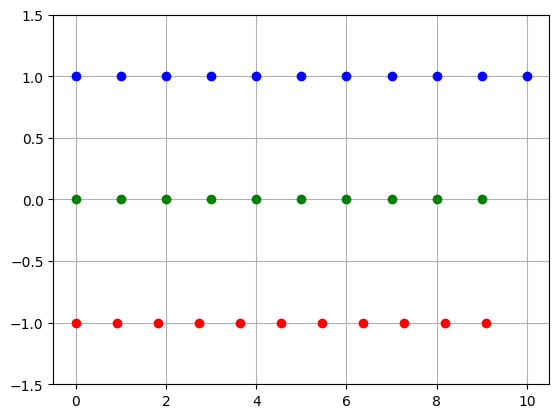

In [ ]:
import matplotlib.pyplot as plt

y11 = np.zeros(11)
y10 = np.zeros(10)

x1 = np.linspace(0, 10, 11, endpoint=True)
x2 = np.linspace(0, 10, 10, endpoint=False)
x3 = np.linspace(0, 10, 11, endpoint=False)

plt.plot(x1, y11 + 1, 'ob')
plt.plot(x2, y10    , 'og')
plt.plot(x3, y11 - 1, 'or')

plt.ylim([-1.5, 1.5])
plt.grid()
plt.show()

In [ ]:
print(x1)
print(x2)
print(x3)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0.         0.90909091 1.81818182 2.72727273 3.63636364 4.54545455
 5.45454545 6.36363636 7.27272727 8.18181818 9.09090909]


## Inspecting arrays

Once you have an array, you'll want to know its properties. NumPy provides several useful attributes for getting metadata about an array's size, shape, and data type.


In [ ]:
data = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.int32)
print(data)

[[1 2 3]
 [4 5 6]]


In [ ]:
# ndarray stands for N-dimensional array.
type(data)

numpy.ndarray

Attribute `.ndim` provides the number of array dimensions (or axes). A 1D array has an .ndim of 1, a 2D array (a matrix) has an .ndim of 2, and so on.

In [ ]:
data.ndim

2

Attribute `.shape` provides a tuple of integers indicating the size of the array in each dimension. For 2D arrays we can descibe the shape in terms of (rows, columns), but in general  we refer to each dimensions as an axis.



In [ ]:
data.shape

(2, 3)

Note: Shape (2,3) indicates:

* Axis 0 contains 2 elements
* Axis 1 contains 3 elements

Attribute `.size` provides the total number of elements in the array. This is always equal to the product of the shape tuple's elements.

In [ ]:
data.size

6

Attribute `.dtype` describes the data type of the elements in the array.

In [ ]:
data.dtype

dtype('int64')

Attribute `.nbytes` provides the total memory in bytes consumed by the array's elements.

In [ ]:
data.nbytes

48

Of course, we can access individual elements of an array with indexing just like lists and tuples:

In [ ]:
r = [ 1.0, 1.5, -2.2]
a = np.array(r,float)
print(f'Index 0 of the array contains {a[0]}')
print(f'Index 1 of the array contains {a[1]}')
print(f'Index 2 of the array contains {a[2]}')


Index 0 of the array contains 1.0
Index 1 of the array contains 1.5
Index 2 of the array contains -2.2


Warning: Be careful using the built-in function `len()` on arrays. While it works for 1D arrays, its behavior can be misleading for multi-dimensional arrays. The `len()` function only returns the size of the first dimension (Axis 0) of an array. It is much safer to use `.shape()` or `.size()`



In [ ]:
array_1d = np.array([0.1, 0.2, 0.3])

print(f"len(array_1d) = {len(array_1d)}")
print(f"array_1d.size = {array_1d.size}")
print(f"array_1d.shape = {array_1d.shape}")

array_2d = np.array([[1, 2, 3, 4],
                     [5, 6, 7, 8],
                     [9, 10, 11, 12]])

# len() only gives the size of the first dimension (the number of rows)
print(f"len(array_2d) = {len(array_2d)}")
print(f"array_2d.size = {array_2d.size}")
print(f"array_2d.shape = {array_2d.shape}")

len(array_1d) = 3
array_1d.size = 3
array_1d.shape = (3,)
len(array_2d) = 3
array_2d.size = 12
array_2d.shape = (3, 4)


## Arithmetic with arrays

#### Basic Arithmetic

Standard arithmetic operators like `+`, `-`, `*`, `/`, and `**` work on NumPy arrays. These operations are applied element-wise, meaning the operation is performed on each corresponding element in the arrays. This requires the arrays to have the same shape, or for one to be a scalar that can be broadcast.

In [ ]:
# Create an array
a = np.array([1,2,3,4],int)

# Multiply every element of a by 2 and create a new array
b = 2*a

print(f'a: {a}')
print(f'b: {b}')
print(f'a+b: {a+b}') # Add a+b element by element
print(f'a*b: {a*b}') # Multiply a*b element by element
print(f'b+1: {b+1}') # Add 1 to every element of b
print(f'a**2: {a**2}') # Square every element of a

a: [1 2 3 4]
b: [2 4 6 8]
a+b: [ 3  6  9 12]
a*b: [ 2  8 18 32]
b+1: [3 5 7 9]
a**2: [ 1  4  9 16]


Note: This is very different than the behavior for lists

In [ ]:
mylist=[1,2,3]
print(mylist*2)

[1, 2, 3, 1, 2, 3]


#### Element-wise vs. Matrix Multiplication

Multiplication of arrays with `*` is also element by element - it is not the dot product or matrix multiplication.

There is a dedicated function `np.dot()` which computes the dot product for 1D arrays, performs matrix multiplication for 2D arrays, and calculates the tensor product for N-D arrays.

Starting Python 3.5, the `@` operator was added to perform  matrix multiplication and is now the preferred method. For example, for 2D arrays, `A @ B` and `np.dot(A, B)` give the exact same result but `A @ B` is prefered.

To be more clear, `@` performs the dot product of the rows of the first matrix with the columns of the second. This is the standard definition of matrix multiplication in linear algebra.

In [ ]:
a = np.array([1,2,3,4],int)
b = np.array([2,4,6,8],int)
print(a)
print(b)
print(a*b) #This is not a dot product. It is multiplying element by element

[1 2 3 4]
[2 4 6 8]
[ 2  8 18 32]


In [ ]:
a = np.array([1,2,3,4],int)
b = np.array([2,4,6,8],int)
print(np.dot(a,b)) # This is a dot product
print(a@b) # This is also a dot product


60
60


2D arrays are similar. Multiplication with `*` is element by element. If you want to calculate the matrix product use `np.dot` or `@`.

In [ ]:
a=np.array([[0,1],[-1,0]],int)
print(a)

[[ 0  1]
 [-1  0]]


In [ ]:
b=np.array([[2,4],[0,1]],int)
print(b)

[[2 4]
 [0 1]]


In [ ]:
print(a*b)

[[0 4]
 [0 0]]


In [ ]:
print(f'a:\n {a}')
print(f'b:\n {b}')
print(f'np.dot(a,b):\n {np.dot(a,b)}')
print(f'a@b:\n {a@b}')

a:
 [[ 0  1]
 [-1  0]]
b:
 [[2 4]
 [0 1]]
np.dot(a,b):
 [[ 0  1]
 [-2 -4]]
a@b:
 [[ 0  1]
 [-2 -4]]


In [ ]:
c=np.array([10,2])
print(f'a:\n {a}')
print(f'c:\n {c}')
print(f'np.dot(a,c):\n {np.dot(a,c)}')
print(f'a@c:\n {a@c}')

a:
 [[ 0  1]
 [-1  0]]
c:
 [10  2]
np.dot(a,c):
 [  2 -10]
a@c:
 [  2 -10]


Remember the rule of matrix multiplication: to find the element in the i-th row and j-th column of the resulting matrix, you calculate the dot product of the i-th row of the first matrix and the j-th column of the second matrix. For this to work, the number of columns in the first matrix must equal the number of rows in the second matrix. For example:

In [ ]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])

B = np.array([[10, 11],
              [20, 21],
              [30, 31]])

C = A @ B

print(C)

[[140 146]
 [320 335]]


#### Universal Functions (ufuncs) for array math

A key feature of NumPy is its library of Universal Functions, or ufuncs. A ufunc is a function that operates on a NumPy array in an element-by-element fashion and is implemented in fast, compiled C code.

This includes a massive range of mathematical functions, such as trigonometric (np.sin, np.cos), exponential (np.exp), and logarithmic (np.log) functions:

https://numpy.org/doc/stable/reference/routines.math.html

Using NumPy math functions on a whole array is way faster than trying to use `map` and `math` functions or using a loop:

In [ ]:
import numpy as np
import math

a=np.array([1,2,3,4],float)
print(f'a: {a}')
print(f'np.sqrt(a): {np.sqrt(a)}  <-----Fast')
print(f'np.array(list(map(math.sqrt,a)),float): {np.array(list(map(math.sqrt,a)),float)}  <-----Slow')


a: [1. 2. 3. 4.]
np.sqrt(a): [1.         1.41421356 1.73205081 2.        ]  <-----Fast
np.array(list(map(math.sqrt,a)),float): [1.         1.41421356 1.73205081 2.        ]  <-----Slow


In [ ]:
# in most languages you would iterate over the entire array and perform the math for each index separately
sqrt_a = []
for i in a:
    x = math.sqrt(i)
    sqrt_a.append(x)
print(sqrt_a)

[1.0, 1.4142135623730951, 1.7320508075688772, 2.0]


In [ ]:
# Trig example
myarray = np.array([0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi/4])
print(np.cos(myarray))
print(np.sin(myarray))
print(np.tan(myarray))
print(np.degrees(myarray))
print(np.round(np.cos(myarray),decimals=2))


[ 1.00000000e+00  7.07106781e-01  6.12323400e-17 -7.07106781e-01
 -1.00000000e+00 -7.07106781e-01 -1.83697020e-16  7.07106781e-01
  6.12323400e-17]
[ 0.00000000e+00  7.07106781e-01  1.00000000e+00  7.07106781e-01
  1.22464680e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01
  1.00000000e+00]
[ 0.00000000e+00  1.00000000e+00  1.63312394e+16 -1.00000000e+00
 -1.22464680e-16  1.00000000e+00  5.44374645e+15 -1.00000000e+00
  1.63312394e+16]
[  0.  45.  90. 135. 180. 225. 270. 315.  90.]
[ 1.    0.71  0.   -0.71 -1.   -0.71 -0.    0.71  0.  ]


## Indexing, Slicing, and Subsetting

Accessing and modifying the data within an array is fundamental to NumPy. NumPy provides a powerful and flexible set of tools for selecting data that go far beyond what is possible with standard Python lists. In this section, we will cover everything from accessing single elements to advanced techniques like boolean masking and fancy indexing.


### Indexing

For 1D arrays indexing has the same notation for lists and arrays:

In [ ]:
# Example 1 - Accessing elements of 1d arrays

# use list() and range() to create a list of evenly spaced values within an interval
list_1d = list(range(0,11))
# use arange() to create a numpy array consiting of evenly spaced values within an interval
array_1d = np.arange(0,11)

print(f'list_1d: {list_1d}')
print(f'array_1d: {array_1d}')

print(f'list_1d[0] = {list_1d[0]}')
print(f'array_1d[0] = {array_1d[0]}')

print(f'list_1d[-1] = {list_1d[-1]}')
print(f'array_1d[-1] = {array_1d[-1]}')



list_1d: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
array_1d: [ 0  1  2  3  4  5  6  7  8  9 10]
list_1d[0] = 0
array_1d[0] = 0
list_1d[-1] = 10
array_1d[-1] = 10


For 2D arrays, accessing one element of the array is different than with a list of lists. With arrays we use a comma notation `myarray[row index, column index]`

In [ ]:
array_2d = np.arange(12).reshape(3, 4)
list_2d = array_2d.tolist()

print(f'list_2d:\n {list_2d}')
print(f'array_2d:\n {array_2d}')

print(f'\nlist_2d[0] = {list_2d[0]}')
print(f'array_2d[0] = {array_2d[0]}')

print(f'\nlist_2d[0][1] = {list_2d[0][1]}')
print(f'array_2d[0,1] = {array_2d[0,1]}')

print(f'\nlist_2d[1][2] = {list_2d[1][2]}')
print(f'array_2d[1,2] = {array_2d[1,2]}')


list_2d:
 [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]]
array_2d:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

list_2d[0] = [0, 1, 2, 3]
array_2d[0] = [0 1 2 3]

list_2d[0][1] = 1
array_2d[0,1] = 1

list_2d[1][2] = 6
array_2d[1,2] = 6


### Slicing

Slicing allows you to select a contiguous range of elements using the `start:stop:step` syntax


In [ ]:
# A 1D array
a1 = np.arange(10, 20)
print('a1')
print(a1)

a1
[10 11 12 13 14 15 16 17 18 19]



1D array slicing works just like a python list:

In [ ]:
# Get elements from index 2 up to (but not including) index 7
print(f"a1[2:7] = {a1[2:7]}")

# Get every second element from the beginning up to index 8
print(f"a1[:8:2] = {a1[:8:2]}")

# Get all elements from index 5 to the end
print(f"a1[5:] = {a1[5:]}")

# Select all elements of the array except for the last element
print(f"a1[:-1] = {a1[:-1]}")

# Select the whole array
print(f"a1[0:] = {a1[0:]}")
print(f"a1[:] = {a1[:]}")

# Select every other element starting with index 0
print(f"a1[0::2]  = {a1[0::2]}")

# Select every other element starting with index 1
print(f"a1[1::2] = {a1[1::2]}")

# Reverse the array
print(f"a1[::-1] = {a1[::-1]}")

a1[2:7] = [12 13 14 15 16]
a1[:8:2] = [10 12 14 16]
a1[5:] = [15 16 17 18 19]
a1[:-1] = [10 11 12 13 14 15 16 17 18]
a1[0:] = [10 11 12 13 14 15 16 17 18 19]
a1[:] = [10 11 12 13 14 15 16 17 18 19]
a1[0::2]  = [10 12 14 16 18]
a1[1::2] = [11 13 15 17 19]
a1[::-1] = [19 18 17 16 15 14 13 12 11 10]


### Multidimensional array slicing

Here we use a comma (unlike lists) to provide a separate slice for each dimension `[row_slice, column_slice]`.

In [ ]:
A = np.array([[ 0,  1,  2,  3,  4,  5],
              [10, 11, 12, 13, 14, 15],
              [20, 21, 22, 23, 24, 25],
              [30, 31, 32, 33, 34, 35],
              [40, 41, 42, 43, 44, 45],
              [50, 51, 52, 53, 54, 55]])

In [ ]:
A

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [ ]:
A[:,0] # The 1st column   # [row, column] # [all rows, column 0]

array([ 0, 10, 20, 30, 40, 50])

In [ ]:
A[:,1] # The 2nd column

array([ 1, 11, 21, 31, 41, 51])

In [ ]:
A[0:3,1] # The first 3 rows of the 2nd column

array([ 1, 11, 21])

In [ ]:
A[2,:] # The third row

array([20, 21, 22, 23, 24, 25])

In [ ]:
A[:3,:3] # subarray - top left # [row 1-3, column 1-3]

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

In [ ]:
A[3:,:3] # subarray - bottomleft # [row 4-end, column 0-3]

array([[30, 31, 32],
       [40, 41, 42],
       [50, 51, 52]])

In [ ]:
A[::2, ::2] # subarray - every second element starting from index 0-0

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

In [ ]:
# every second row starting from index 1,
#    and every third column starting from index 1.
A[1::2,1::3]

array([[-3,  0],
       [ 0,  3],
       [ 0,  3]])

Note: Slicing a NumPy array creates a view, which is a window into the original data. Modifying the view will modify the original array. Slicing a Python list creates a copy, and modifying the copy will not affect the original.

In [ ]:
# A 2D array
a2 = np.array([[10, 20, 30, 40],
               [50, 60, 70, 80],
               [90, 100, 110, 120]])


In [ ]:
# --- NumPy View ---
print("--- NumPy (View) ---")
# Create a slice of the first row
a2_slice = a2[0, :]
print(f"Original first row of a2: {a2[0]}")

# Modify the slice
a2_slice[0] = 999
print(f"Modified slice: {a2_slice}")
print(f"The original array a2 has also been changed:\n{a2}\n")


# --- Python List Copy ---
print("--- Python List (Copy) ---")
my_list = [[1, 2], [3, 4]]
# Create a slice of the first row
list_slice = my_list[0][:] # Note: a full slice [:] is needed to create the copy
print(f"Original first row of my_list: {my_list[0]}")

# Modify the slice
list_slice[0] = 999
print(f"Modified slice: {list_slice}")
print(f"The original list is unchanged: {my_list}")

--- NumPy (View) ---
Original first row of a2: [10 20 30 40]
Modified slice: [999  20  30  40]
The original array a2 has also been changed:
[[999  20  30  40]
 [ 50  60  70  80]
 [ 90 100 110 120]]

--- Python List (Copy) ---
Original first row of my_list: [1, 2]
Modified slice: [999, 2]
The original list is unchanged: [[1, 2], [3, 4]]


If you don't want to modify the original you can make a copy with copy()

In [ ]:
a = np.arange(10)

# my_view is a view that shares data with 'a'
my_view = a[0:5]

# my_copy is a new, independent array
my_copy = a[0:5].copy()

# Modifying the copy does not affect the original
my_copy[0] = 99
print(f"The original array is unchanged: {a}")

# Modifying the view DOES affect the original
my_view[0] = 99
print(f"The original array is now changed: {a}")

The original array is unchanged: [0 1 2 3 4 5 6 7 8 9]
The original array is now changed: [99  1  2  3  4  5  6  7  8  9]


### Subsetting with Conditions and Lists

Beyond basic slicing, NumPy offers more advanced ways to select data based on conditions or specific index lists.



#### Boolean Indexing (Masking)

A common task in data analysis is to select a subset of data that matches a certain condition. NumPy makes this easy with a technique called boolean indexing or masking. The process involves two main steps:

*Step 1: Create a Boolean Mask*

First, you create a boolean array, called a mask, by applying a condition directly to your array. NumPy performs the comparison for each element and returns a new array of True or False values.

`boolean_array = original_array>5`

*Step 2: Use the Mask to Select Data*

Next, you use this mask inside the square brackets of the original array. This creates a new array containing only the elements that correspond to a True position in your mask.

`selected_array = original_array[boolean_array]`

In the termenology of NumPy, your boolean array is a "mask".

In [ ]:
original_array = np.array([15,2,6,34,22,7])
boolean_array = original_array>10
selected_array = original_array[boolean_array]
print(f'original_array: {original_array}')
print(f'boolean_array: {boolean_array}')
print(f'selected_array: {selected_array}')

original_array: [15  2  6 34 22  7]
boolean_array: [ True False False  True  True False]
selected_array: [15 34 22]


While it is helpful to think of boolean masking as a two step process, one often accomplishes it in one line:

In [ ]:
selected_array = original_array[original_array>10]
print(f'selected_array: {selected_array}')

selected_array: [15 34 22]


In [ ]:
# A 2D array
a2 = np.array([[10, 20, 30, 40],
               [50, 60, 70, 80],
               [90, 100, 110, 120]])


In [ ]:
# Another example

# Create a boolean mask for all values greater than 60
mask = a2 > 60
print(f"The boolean mask:\n{mask}\n")

# Use the mask to select only the values that meet the condition
high_values = a2[mask]
print(f"Values greater than 60: {high_values}")

The boolean mask:
[[False False False False]
 [False False  True  True]
 [ True  True  True  True]]

Values greater than 60: [ 70  80  90 100 110 120]


In [ ]:
# Another example
a2 = np.array([[10, 20, 30, 40],
               [50, 60, 70, 80],
               [90, 100, 110, 120]])

# mask "by-hand"
mask = np.array([[True, False, True, False],
                 [False, True, False, False],
                 [False, False, True, False]])

# Using the mask always creates a 1D array of the selected values
selected_values = a2[mask]

print(f"The shape of a2 is: {a2.shape}")
print(f"The selected values are: {selected_values}")
print(f"The shape of selected_values is: {selected_values.shape}")

The shape of a2 is: (3, 4)
The selected values are: [ 10  30  60 110]
The shape of selected_values is: (4,)


In [ ]:
# One last Example
#  Using a mask from one array to select from another

# A 2D array of temperature readings
temps = np.array([[25, 105, 30],
                  [28,  98, 29],
                  [110, 35, 27]])

# A 2D array of pressure readings at the same locations
pressures = np.array([[1.0, 1.9, 1.1],
                      [1.1, 1.8, 1.0],
                      [2.1, 1.2, 1.0]])

# Create the boolean mask
high_temp_mask = (temps > 100)
print(f"The boolean mask for high temperatures:\n{high_temp_mask}\n")

# Here we are using the high temperature mask on the pressure data
#  so we can check the pressures when temperature is high
pressure_values_from_masking = pressures[high_temp_mask]
print(f"Result from Boolean Masking (the values):\n{pressure_values_from_masking}\n")


The boolean mask for high temperatures:
[[False  True False]
 [False False False]
 [ True False False]]

Result from Boolean Masking (the values):
[1.9 2.1]



####  Finding Indices with np.where()

Sometimes you don't want the values that satisfy a condition, but rather their locations or indices. This is useful when you need to know the position of specific data points. The np.where() function is the primary tool for this task.

When given a single argument—a boolean array (or mask)—np.where() returns a tuple of arrays containing the indices of all the True elements.

In [ ]:
original_array = np.array([1, 15, 4, 20, 9, 30])

# Create a mask ( a boolean array)
mask = original_array > 10
print(f"The boolean mask is: {mask}\n")

# np.where() returns the indices where the mask is True
indices = np.where(mask)

# For a 1D array, the result is a tuple with one array of indices
print(f"The indices of elements > 10 are: {indices[0]}")

The boolean mask is: [False  True False  True False  True]

The indices of elements > 10 are: [1 3 5]


In [ ]:
# A 2D array
a2 = np.array([[10, 20, 30, 40],
               [50, 60, 70, 80],
               [90, 100, 110, 120]])

In [ ]:
# Use np.where to find the indices of all values greater than 60
indices = np.where(a2 > 60)
print(f"Indices of values > 60: {indices}\n")

# The result is a tuple of (row_indices, col_indices)
# This means the values are at coordinates (1, 2), (1, 3), (2, 0), etc.

# np.where can also be used to choose between two values based on a condition
# np.where(condition, value_if_true, value_if_false)
capped_a2 = np.where(a2 > 100, 100, a2) # Cap all values at 100
print(f"Array with values capped at 100:\n{capped_a2}")

Indices of values > 60: (array([1, 1, 2, 2, 2, 2]), array([2, 3, 0, 1, 2, 3]))

Array with values capped at 100:
[[ 10  20  30  40]
 [ 50  60  70  80]
 [ 90 100 100 100]]


#### Selecting Elements by Index List (Fancy Indexing)

Finally, NumPy allows you to select elements using a list or another array of integer indices. This powerful technique is called fancy indexing. It allows you to select any number of elements in any order, even picking the same element multiple times.

Unlike basic slicing which creates a view, fancy indexing always creates a copy of the data.

In [ ]:
# An array of 10 sensor readings
sensor_data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# An array of the specific indices we want to retrieve
indices_to_get = np.array([0, 4, 8, 2, 2]) # Note: we are selecting index 2 twice

# Use the list of indices to select the elements
selected_data = sensor_data[indices_to_get]

print(f"The original data is: {sensor_data}")
print(f"The selected data is: {selected_data}")

The original data is: [ 10  20  30  40  50  60  70  80  90 100]
The selected data is: [10 50 90 30 30]


In [ ]:
# A 1D array
a1 = np.arange(10, 20)
# A 2D array
a2 = np.array([[10, 20, 30, 40],
               [50, 60, 70, 80],
               [90, 100, 110, 120]])

In [ ]:
# Select the elements at indices 8, 2, and 5 from our 1D array
selected_elements = a1[[8, 2, 5]]
print(f"Selected elements from a1: {selected_elements}\n")


# You can also use fancy indexing on 2D arrays
# Get the rows at index 2, 0, and then 2 again
selected_rows = a2[[2, 0, 2]]
print(f"Selected rows from a2:\n{selected_rows}")

Selected elements from a1: [18 12 15]

Selected rows from a2:
[[ 90 100 110 120]
 [ 10  20  30  40]
 [ 90 100 110 120]]


It's a common pattern to first use `np.where()` to find the indices of elements that satisfy a condition, and then use those indices with fancy indexing to create a subset of an array.

However, if your only goal is to create a subset from that same array, the more direct and readable method is to use boolean masking.

In [ ]:
# If you only care about the values
#   Use boolean masking (more direct)

data = np.array([10, 50, 20, 80, 40])
subset = data[data > 30] # The condition is used directly as the index
print(f"Subset using boolean mask: {subset}")

Subset using boolean mask: [50 80 40]


In [ ]:
# If you also want the indeces in addtion to the values
#   then use np.where() + Fancy Indexing

# Get the indices
indices = np.where(data > 30)
# Step 2: Use the indices to get the values
subset = data[indices]
print(f"Subset using np.where and fancy indexing: {subset}")

Subset using np.where and fancy indexing: [50 80 40]


Example: Here is a case where np.where() + fancy indexing can be used together to select from multiple arrays and give specific coordinates of an issue

Imagine you are monitoring a small server farm. You have data from a grid of sensors arranged in racks (rows) and server positions (columns). You are collecting temperature, CPU load, and you also have a map of the server IDs.

Your goal is to identify any servers that are overheating (temperature > 90°C) and find out which specific servers they are and what their CPU load is.

In [ ]:
import numpy as np

# Data for a 3x4 server rack
# Each row is a rack, each column is a server position

# Array 1: Temperature readings (°C)
temperatures = np.array([
    [82, 85, 86, 81],
    [91, 95, 89, 88], # A hotspot in this rack
    [79, 81, 83, 80]
])

# Array 2: CPU load (%) at the same locations
cpu_loads = np.array([
    [70, 75, 72, 68],
    [92, 98, 85, 81], # Note the high CPU load corresponds to the hotspot
    [65, 68, 71, 66]
])

# Array 3: A map of server IDs (strings)
server_ids = np.array([
    ['R0-S0', 'R0-S1', 'R0-S2', 'R0-S3'],
    ['R1-S0', 'R1-S1', 'R1-S2', 'R1-S3'],
    ['R2-S0', 'R2-S1', 'R2-S2', 'R2-S3']
])

In [ ]:
# Step 1: Use np.where() to find the indices (the "where") of overheating servers.
hotspot_indices = np.where(temperatures > 90)

print(f"The raw indices of the hot spots are: {hotspot_indices}\n")

# Step 2: Use these indices with fancy indexing to look up data in the other arrays.
hot_server_ids = server_ids[hotspot_indices]
hot_server_loads = cpu_loads[hotspot_indices]
hot_server_temps = temperatures[hotspot_indices]

# Step 3: Report the findings in a readable way.
print("--- Overheating Server Alert ---")
for i in range(len(hot_server_ids)):
    server = hot_server_ids[i]
    temp = hot_server_temps[i]
    load = hot_server_loads[i]
    print(f" > Alert for Server '{server}': Temperature is {temp}°C with CPU load at {load}%.")


The raw indices of the hot spots are: (array([1, 1]), array([0, 1]))

--- Overheating Server Alert ---
 > Alert for Server 'R1-S0': Temperature is 91°C with CPU load at 92%.
 > Alert for Server 'R1-S1': Temperature is 95°C with CPU load at 98%.


We used one type of data (temperature) to find locations of interest. We then used those exact same locations to cross-reference and retrieve critical, related information (server IDs and CPU loads) from other datasets. Extracting explicit indices with np.where() makes this possible.

### Exercises - Indexing, slicing, and masking

*Exercise 1*

The following 5x5 array, heat_map, represents temperature readings on a metal plate. The center of the plate is the hottest.

1. Select and print all the data from the third row (at index 2).

2. Select and print all the data from the last column.

3. Select and print the 2x2 sub-array from the top-left corner of the heat map.

4. Select and print the central 3x3 "hot core" of the heat map, excluding the cooler outer border.

In [ ]:
import numpy as np

heat_map = np.array([
    [10, 12, 15, 13, 11],
    [13, 40, 45, 42, 14],
    [16, 48, 50, 46, 17],
    [14, 41, 44, 43, 15],
    [11, 13, 16, 14, 12]
])

*Exercise 2*

You are analyzing the trajectory of a projectile thrown vertically into the air. The following NumPy array, velocities, contains the vertical velocity (in m/s) of the projectile recorded at one-second intervals. A positive velocity means the projectile is moving upward, and a negative velocity means it is moving downward.

1. Create a boolean mask to identify all the time steps where the projectile was moving upward (velocity > 0).

2. Use this mask to create a new array called upward_velocities that contains only the positive velocity values.

3. In a single line of code, find and print all the velocities where the projectile's speed (the absolute value of its velocity) was greater than 20 m/s.

In [ ]:
import numpy as np

# Vertical velocity (m/s) of a projectile over time
velocities = np.array([29.4, 19.6, 9.8, 0.0, -9.8, -19.6, -29.4, -39.2])

## Statistical Analysis

Statistical analysis allows you to summarize and describe the data in a NumPy array. NumPy provides a wide range of fast and efficient aggregation functions which takes many values from an array and returns a single value that summarizes them, such as the sum, mean, or standard deviation.


#### Quick performance discussion

Lets start with calculating the sum of the elements of an array. This is probably the most fundamental aggregation and it will serve as a good example of NumPy calculation speed.

There are several ways you might think to sum the elements of an array, but they have dramatically different performance characteristics. Let's compare the NumPy methods (`np.sum()` and `.sum()`) against Python's built-in `sum()` function and a standard `for` loop.

In [ ]:
import numpy as np
import time

# Let's create a large array representing 1 million energy readings from a particle detector
energy_readings = np.random.rand(1_000_000) * 100 # Simulate energies from 0-100 GeV
print("--- Comparing Summation Methods on 1,000,000 elements ---\n")

# --- Method 1: The NumPy Array Method (.sum()) ---
start_time = time.time()
sum_method = energy_readings.sum()
end_time = time.time()
duration_method = (end_time - start_time) * 1000 # Convert to milliseconds
print(f"Result from .sum() method: {sum_method:.2f}")
print(f"Duration: {duration_method:.4f} ms\n")


# --- Method 2: The NumPy Function (np.sum()) ---
start_time = time.time()
sum_function = np.sum(energy_readings)
end_time = time.time()
duration_function = (end_time - start_time) * 1000 # Convert to milliseconds
print(f"Result from np.sum() function: {sum_function:.2f}")
print(f"Duration: {duration_function:.4f} ms\n")


# --- Method 3: Python's Built-in sum() ---
# WARNING: This is very slow for NumPy arrays.
start_time = time.time()
sum_builtin = sum(energy_readings)
end_time = time.time()
duration_builtin = (end_time - start_time) * 1000 # Convert to milliseconds
print(f"Result from built-in sum(): {sum_builtin:.2f}")
print(f"Duration: {duration_builtin:.4f} ms\n")


# --- Method 4: A Python for loop ---
# WARNING: This is the slowest method of all.
start_time = time.time()
total = 0
for x in energy_readings:
    total += x
end_time = time.time()
duration_loop = (end_time - start_time) * 1000 # Convert to milliseconds
print(f"Result from for loop: {total:.2f}")
print(f"Duration: {duration_loop:.4f} ms")

--- Comparing Summation Methods on 1,000,000 elements ---

Result from .sum() method: 49981198.44
Duration: 1.7054 ms

Result from np.sum() function: 49981198.44
Duration: 1.4734 ms

Result from built-in sum(): 49981198.44
Duration: 234.8886 ms

Result from for loop: 49981198.44
Duration: 460.2263 ms


As you can see, the numpy versions are much faster.

`np.sum()`  and `.sum()` are equilvalent ways to use NumPy to calculate the sum of the elements of an array.  These functions use a pre-compiled, highly optimized C loop that operates directly on the array's data in memory. The entire calculation happens at the machine-code level, bypassing the Python interpreter entirely, which makes it incredibly fast.

The built-in `sum()` we learned about in a previous notebook works great for lists but it is not designed for NumPy. It iterates through the array and pulls out each element one-by-one, converting it from a simple NumPy number into a full-featured Python number object. This "unboxing" process has a huge overhead for every single element, making it dramatically slower.

The `for` loop is the slowest because every step of the loop (checking the condition, accessing the element, performing the addition) is handled by the slow Python interpreter.



### Basic Aggregation Functions

NumPy provides many  essential aggregation functions that are very efficient:

`.sum()` or `np.sum()`: Calculates the sum of all the elements of an array.

`.mean()` or `np.mean()`: Calculates the average of the elements.

`.std()` or `np.std()`: Calculates the standard deviation, a measure of how spread out the data is.

`.min()` or  `np.min()`: Finds the minimum value in the array.

`.max()` or `np.max()`: Finds the maximum value in the array.

`.prod()` or `np.prod()`: Calculates the product of all elements in the array.


There are also tools then allow us to return the indeces instead of the values:

`.argmax()` or `np.argmax()`: returns the index of the maximum

`.argmin()` or `np.argmin()`: returns the index of the minimum

While argmax() and argmin() are great for finding the location of a single extreme value, there are times when we want to find all of the indices that satisfy a condition (e.g., all stars brighter than a certain magnitude). We already learned that we can use 'np.where()` to accomplish this!




In [ ]:
# Example with using the aggregate method
#  Here the function that belongs to the array object itself and is called on that object.

# Simulate 50 radial velocity measurements of a star in km/s
# A positive value means it's moving away from us (redshifted).
star_velocities = np.random.normal(loc=25, scale=5, size=50) # Average velocity 25 km/s, std dev 5 km/s

print(f"Mean velocity:      {star_velocities.mean():.2f} km/s")
print(f"Standard deviation: {star_velocities.std():.2f} km/s")
print(f"Fastest recorded velocity (max): {star_velocities.max():.2f} km/s")
print(f"Slowest recorded velocity (min): {star_velocities.min():.2f} km/s")

Mean velocity:      24.75 km/s
Standard deviation: 5.51 km/s
Fastest recorded velocity (max): 38.35 km/s
Slowest recorded velocity (min): 10.40 km/s


In [ ]:
# Example using the aggegate functions
#   Use a general function from the NumPy library that takes an array as an argument.

# Simulate 50 radial velocity measurements of a star in km/s
# A positive value means it's moving away from us (redshifted).
star_velocities = np.random.normal(loc=25, scale=5, size=50) # Average velocity 25 km/s, std dev 5 km/s

print(f"Mean velocity:      {np.mean(star_velocities):.2f} km/s")
print(f"Standard deviation: {np.std(star_velocities):.2f} km/s")
print(f"Fastest recorded velocity (max): {np.max(star_velocities):.2f} km/s")
print(f"Slowest recorded velocity (min): {np.min(star_velocities):.2f} km/s")

Mean velocity:      25.14 km/s
Standard deviation: 4.26 km/s
Fastest recorded velocity (max): 33.26 km/s
Slowest recorded velocity (min): 13.96 km/s


In [ ]:
# The aggregate functions are more general than the methods
new_list = [1.5,2.3,5.1]
print(np.max(new_list)) # This works on lists and arrays
# print(new_list.max()) # this does not work on lists

5.1


In [ ]:
# Let's simulate the brightness of several stars observed by a telescope
star_brightness = np.array([10.2, 11.5, 9.8, 13.1, 10.9])

# Find the max and min value
brightest_value = star_brightness.max()
dimmest_value = star_brightness.min()

print(f"The brightest star has a value of: {brightest_value}")
print(f"The dimmest star has a value of: {dimmest_value}\n")


# Find the max and min index location using the methods argmax() argmin()
brightest_star_index = star_brightness.argmax()
dimmest_star_index = star_brightness.argmin()

print(f"The brightest star is at index: {brightest_star_index}")
print(f"The dimmest star is at index: {dimmest_star_index}")

# Alternate use np.argmax() and np.argmin() as a function
print(f"The brightest star is at index: {np.argmax(star_brightness)}")
print(f"The dimmest star is at index: {np.argmin(star_brightness)}")




The brightest star has a value of: 13.1
The dimmest star has a value of: 9.8

The brightest star is at index: 3
The dimmest star is at index: 2
The brightest star is at index: 3
The dimmest star is at index: 2


In [ ]:
# Use np.where() to find the indices of all stars with brightness > 11.0
bright_stars_indices = np.where(star_brightness > 11.0)

print(f"The indices of stars brighter than 11.0 are: {bright_stars_indices[0]}")

# You can then use these indices to select the values themselves
bright_star_values = star_brightness[bright_stars_indices]
print(f"The values of those bright stars are: {bright_star_values}")

NameError: name 'star_brightness' is not defined

### Aggregating Along Axes

The `axis` parameter  allows you to perform an aggregation along a specific dimension of a multi-dimensional array.

Think of the `axis` parameter as specifying the direction the operation "travels".


* axis=0: You squish the array vertically.
  * The calculation moves vertically, down the rows (axis 0) for each column.
  * You are left with a summary for each column.

* axis=1: You squish the array horizontally.
  * The calculation moves horizontally, across the columns (axis 1) for each row.
  * You are left with a summary for each row.

In [ ]:
# Imagine a 2D array of temperature readings from a lab.
# Each row is a different sensor,
# Each column is a time step (t=0, t=1, t=2).
lab_temps = np.array([[25.1, 25.3, 25.5],  # Sensor 1
                      [24.9, 25.0, 25.2],  # Sensor 2
                      [24.9, 25.0, 25.2]]) # Sensor 3

# Calculate the overall average temperature (default axis=None)
overall_mean = lab_temps.mean()
print(f"Overall mean temperature: {overall_mean:.2f}°C\n")

# Calculate the average temperature for each SENSOR
#  (across the columns, axis=1)
sensor_means = lab_temps.mean(axis=1)
print(f"Average for each sensor: {sensor_means}\n")
print(f"   Check mean Sensor 1: {lab_temps[0].mean()}")
print(f"   Check mean Sensor 2: {lab_temps[1].mean()}")
print(f"   Check mean Sensor 3: {lab_temps[2].mean()}\n")

# Calculate the average temperature at each TIME STEP
#  (down the rows, axis=0)
timestep_means = lab_temps.mean(axis=0)
print(f"Average at each time step: {timestep_means}")
print(f"   Check mean Time Step 1: {lab_temps[:, 0].mean():.2f}")
print(f"   Check mean Time Step 2: {lab_temps[:, 1].mean():.2f}")
print(f"   Check mean Time Step 3: {lab_temps[:, 2].mean():.2f}\n")

Overall mean temperature: 25.12°C

Average for each sensor: [25.3        25.03333333 25.03333333]

   Check mean Sensor 1: 25.3
   Check mean Sensor 2: 25.03333333333333
   Check mean Sensor 3: 25.03333333333333

Average at each time step: [24.96666667 25.1        25.3       ]
   Check mean Time Step 1: 24.97
   Check mean Time Step 2: 25.10
   Check mean Time Step 3: 25.30



### Exercises - Statistical Analysis



Exercise: Analyzing Weekly Weather Data

You are given a 2D NumPy array containing the average daily temperature (in Celsius) for four different cities over a seven-day week.

Each row represents a different city, and each column represents a day of the week, from Monday to Sunday.

1. Overall Weekly Statistics: Calculate the mean, minimum, and maximum temperature recorded across all cities for the entire week.

2. City Averages: Calculate the average weekly temperature for each city. Your result should be a 1D array with four values.

3. Daily Averages: Calculate the average temperature for each day of the week across all the cities. Your result should be a 1D array with seven values.

4. Hottest Day: On which day of the week (Monday=0, Sunday=6) was the average temperature across all cities the highest?

In [ ]:
import numpy as np

# Data: Temperatures for 4 cities over 7 days
# Rows: City A, City B, City C, City D
# Columns: Mon, Tue, Wed, Thu, Fri, Sat, Sun
temps = np.array([
    [15.1, 16.3, 15.8, 17.2, 16.9, 18.1, 17.5], # City A
    [12.5, 13.1, 13.8, 14.5, 15.2, 15.9, 14.8], # City B
    [18.2, 18.5, 19.1, 19.8, 20.3, 20.1, 19.5], # City C
    [14.8, 15.2, 14.9, 15.9, 16.1, 16.8, 16.3]  # City D
])

## Manipulating Arrays

### Reshape

In [ ]:
a = np.arange(20)
print(a)

a = a.reshape(4, 5)
print(a)

print(a.shape)
print(a.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
(4, 5)
2


## Linear Algebra with NumPy

Linear algebra is a language of physics, describing everything from classical mechanics to quantum states. NumPy's `linalg` module provides a highly optimized and easy-to-use set of linear algebra functions.

### Vectors, Matrices, and Multiplication

First, let's define a 2D position vector and a rotation matrix. In physics, a rotation matrix is used to change the basis of a vector.

Crucially, the * operator performs element-wise multiplication, while the @ operator performs the matrix product.


In [ ]:

# A position vector for a particle at (x=2, y=1)
r_vec = np.array([2, 1])

# A rotation matrix for a 30-degree counter-clockwise rotation
theta = np.deg2rad(30) # Convert 30 degrees to radians
c, s = np.cos(theta), np.sin(theta)
rot_matrix = np.array([[c, -s],
                       [s,  c]])

# Apply the rotation to the vector using matrix multiplication
rotated_vec = rot_matrix @ r_vec

print(f"Original vector:\n{r_vec}")
print(f"\nRotation matrix:\n{rot_matrix}")
print(f"\nRotated vector:\n{rotated_vec}")

Original vector:
[2 1]

Rotation matrix:
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]

Rotated vector:
[1.23205081 1.8660254 ]


## Iterating over an array

In [ ]:
a = np.arange(20)
a = a.reshape(4, 5)

print("a:")
print(a)

print("\nLoop:")
for i in a: # Iterate over rows:
    print(i) # Each entry is an array
    for j in i: # Iterate within a row
        print(j)

a:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

Loop:
[0 1 2 3 4]
0
1
2
3
4
[5 6 7 8 9]
5
6
7
8
9
[10 11 12 13 14]
10
11
12
13
14
[15 16 17 18 19]
15
16
17
18
19


In [ ]:
# Iterate over every element

# Use nditer https://numpy.org/doc/stable/reference/generated/numpy.nditer.html

for i in np.nditer(a):
    print(i, sep=", ",end=" ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

In [ ]:
# Good practice to use nditer for any array

x = np.arange(15)
for i in np.nditer(x):
    print(i, sep=", ",end=" ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 

In [ ]:
# nditer creates a iterator object which you can predefine

x = np.arange(0,20,2)
it = np.nditer(x)
for value in it:
    print(value, sep=", ",end=" ")

0 2 4 6 8 10 12 14 16 18 

In [ ]:
# This allows you to access both the array value at a given index and the index

x = np.arange(0,20,2)
it = np.nditer(x, flags=['f_index']) # track the index
for value in it:
    print("value",value,"index",it.index )

value 0 index 0
value 2 index 1
value 4 index 2
value 6 index 3
value 8 index 4
value 10 index 5
value 12 index 6
value 14 index 7
value 16 index 8
value 18 index 9


## Indexing with booleans (one more example)

Skip this if you understand already


In [ ]:
import numpy as np
a = np.array([5,3,2,6,8,1,9,4,3,0,3,5,1,7,9,4,2,2,6,8,9])
print("array a:",a)
print("len a:", len(a))

array a: [5 3 2 6 8 1 9 4 3 0 3 5 1 7 9 4 2 2 6 8 9]
len a: 21


In [ ]:
# Create an array of booleans which tells us if a given
#  element of array a is greater or equal to 5
b = a>=5

In [ ]:
print("array b:",b)
print("len b:", len(b))

array b: [ True False False  True  True False  True False False False False  True
 False  True  True False False False  True  True  True]
len b: 21


In [ ]:
# Create an array which only contains the elements of a
#  which passed our selection above (and therefore are True in b)
c = a[b]
print("array c:",c)
print("len c:", len(c))

array c: [5 6 8 9 5 7 9 6 8 9]
len c: 10


In [ ]:
# There are of course other ways of doing this, instead of the numpy way above
d = []
for i in np.nditer(a):
    if float(i)>=5:
        d.append(int(i))
da = np.array(d,int)
print(da)

[5 6 8 9 5 7 9 6 8 9]


## Importing Data with Numpy

https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

We will learn more about this later, but for now know that one can import data to numpy arrays using "loadtxt". You have a few options: Feed loadtxt the name of a local file within the directory where your notebook is located, feed loadtxt the path and filename to a file on your computer, or give it a url to web-based data.

In [ ]:
url = 'https://raw.githubusercontent.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/master/Data/millikan.txt'
data = np.loadtxt(url,float)
x = data[:,0]
y = data[:,1]
print(x)
print(y)
print(data)

[5.4874e+14 6.9310e+14 7.4307e+14 8.2193e+14 9.6074e+14 1.1840e+15]
[0.5309  1.0842  1.2734  1.6598  2.19856 3.10891]
[[5.48740e+14 5.30900e-01]
 [6.93100e+14 1.08420e+00]
 [7.43070e+14 1.27340e+00]
 [8.21930e+14 1.65980e+00]
 [9.60740e+14 2.19856e+00]
 [1.18400e+15 3.10891e+00]]


## Final Exercises

In [ ]:
A = np.array([[ 4, -1,  4,  0,  0,  0],
              [ 5, -3,  3,  0,  0,  0],
              [ 3,  2, -3,  0,  0,  0],
              [ 0,  0,  0,  2,  3, -3],
              [ 0,  0,  0, -5,  4,  3],
              [ 0,  0,  0,  1,  3,  4]])

1. Create array Asquared which contains A with every element squared

2. Create subarray B which is a 3x3 array containting the top left of A. Createa subarray C which is a 3x3 array containting the bottom right of A. Use matrix multipliation to find B times C.

3. Use numpy fabs to take the absolute value of each element of A.

4. Turn every 0 in array A into a 9. Hint: Index with Booleans then change all True elements to 9.